In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from read_edf import read_edf_file

file_path = "../database/sleep-cassette/SC4002E0-PSG.edf"
labels, data, frequency = read_edf_file(file_path)

if labels and data and frequency:
    print("Signal Labels:", labels)
    print("Data Shape:", [len(channel) for channel in data])
    print("Sample Frequency:", frequency)
else:
    print("Failed to read .edf file.")


Signal Labels: ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']
Data Shape: [8490000, 8490000, 8490000, 84900, 84900, 84900, 84900]
Sample Frequency: 100.0


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


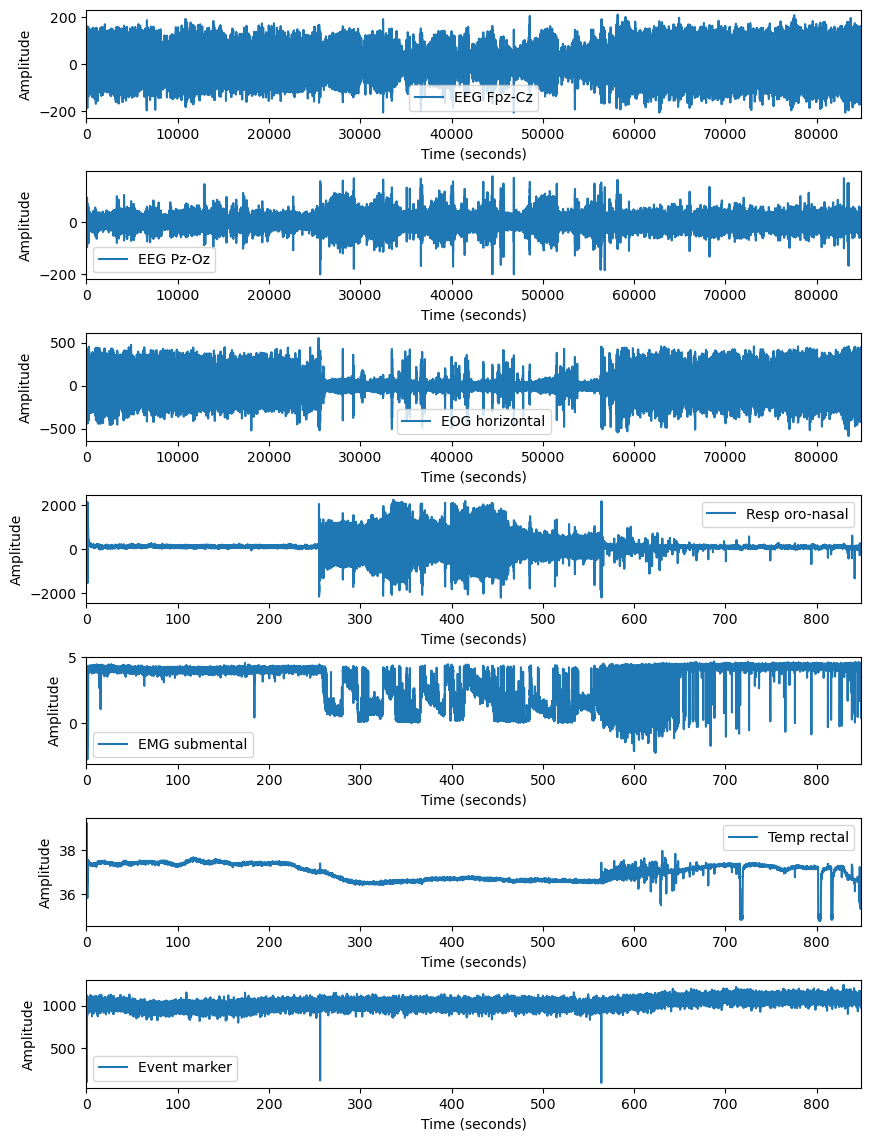

In [7]:
from read_edf import plot_signals
plot_signals(labels, data, frequency)

In [6]:
from read_result import read_result_file
result_path = "../database/sleep-cassette/SC4001EC-Hypnogram.edf"
start_times, durations, labels = read_result_file(result_path)
# print(labels)

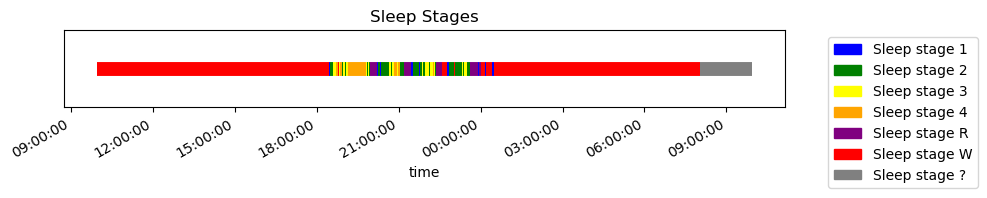

In [7]:
from read_result import plot_sleep_stages
plot_sleep_stages(start_times, durations, labels)

In [22]:
from split_signal import split_edf_by_annotations
annotations = read_result_file(result_path)
edf_path = "../database/sleep-cassette/SC4002E0-PSG.edf"
# res = split_edf_by_annotations(edf_path, start_times, durations, labels)
import pyedflib
def debug(edf_file, start_times, durations, events):
    # read edf file
    with pyedflib.EdfReader(edf_file) as edf:
        signals = []
        Fs = edf.getSampleFrequency(0)
        for i in range(edf.signals_in_file):
            signals.append(edf.readSignal(i))
        
        # results
        split_signals = []

        for start_time, duration, event in zip(start_times, durations, events):
            start_sample = int(start_time * Fs)
            end_sample = start_sample + int(duration * Fs)

            
            event_signals = []
            for signal in signals:
                split_signal = signal[start_sample:end_sample]
                event_signals.append(split_signal)

            split_signals.append((event, event_signals))

        return split_signals
res = debug(edf_path, start_times, durations, labels)
print(len(res[0][2]))

IndexError: tuple index out of range